In [72]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
pd.set_option('display.max_columns', None) # for clean display

In [75]:
df = pd.read_csv("Churn_data.csv") #Load the csv

In [76]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df.shape

(7043, 21)

In [78]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
# Summary stats
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Data Cleaning Checklist

In [81]:
# Convert 'TotalCharges' to numeric (sometimes has errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check again for nulls (after conversion)
df.isnull().sum()

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

# Optional: Reset index after cleaning
df.reset_index(drop=True, inplace=True)

Exploratory Data Analysis

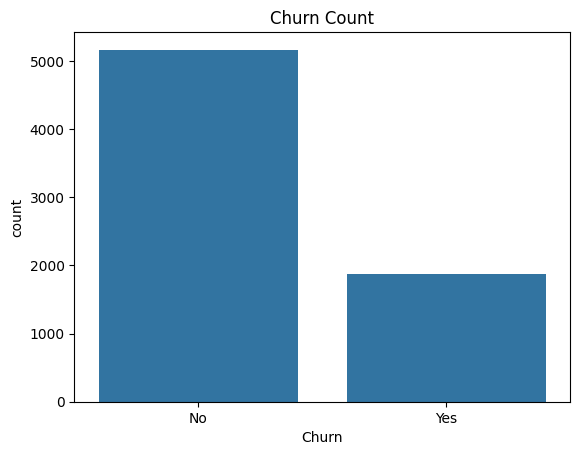

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [82]:
# Countplot for churn
sns.countplot(data=df, x='Churn')
plt.title("Churn Count")
plt.show()

# Churn rate %
df['Churn'].value_counts(normalize=True) * 100

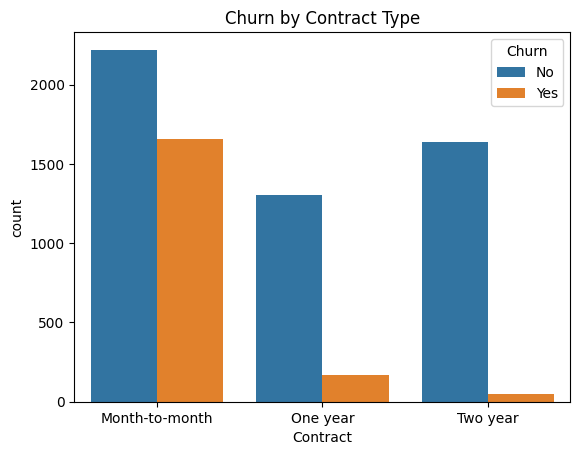

In [83]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

In [84]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64

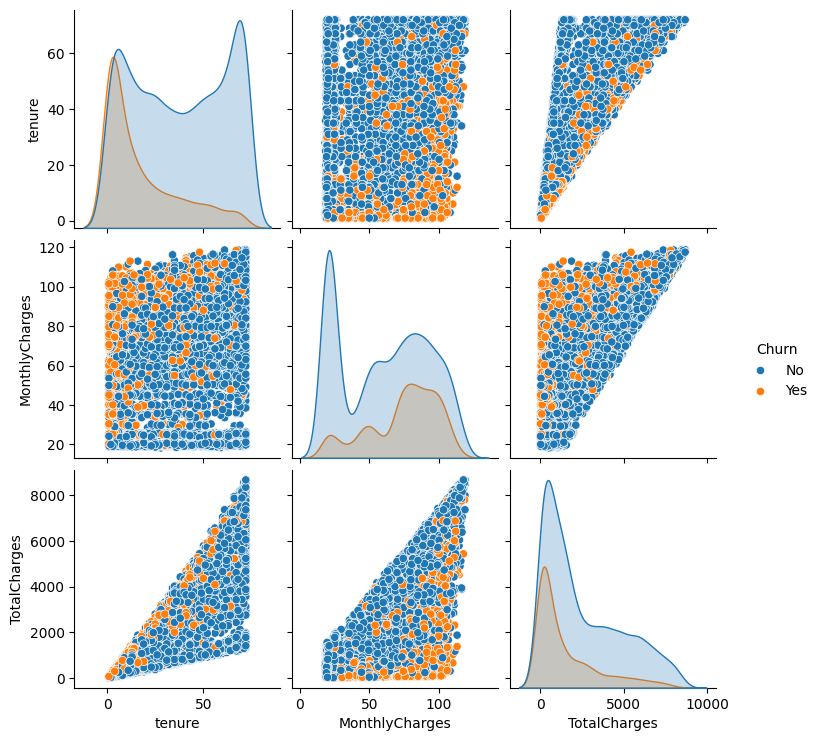

In [85]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[numeric_cols + ['Churn']], hue='Churn')
plt.show()

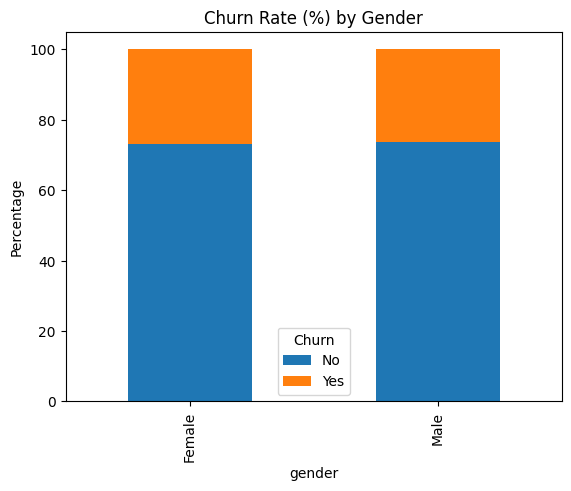

Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


In [86]:
# Calculate churn rate by gender
gender_churn_rate = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
gender_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by Gender")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(gender_churn_rate)


In [87]:
df.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: count, dtype: int64

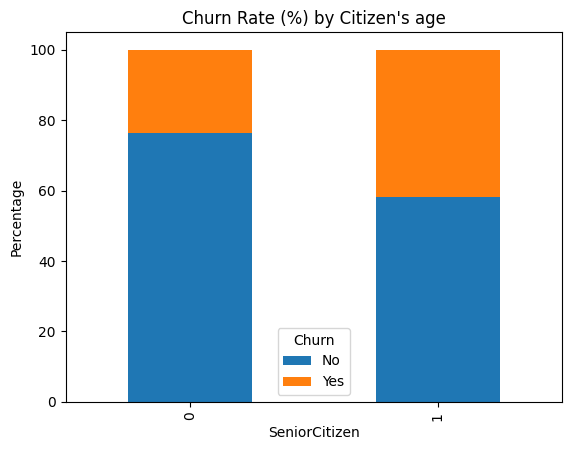

Churn                 No        Yes
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


In [88]:
# Calculate churn rate by SeniorCitizen
SeniorCitizen_churn_rate = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
SeniorCitizen_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by Citizen's age")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(SeniorCitizen_churn_rate)

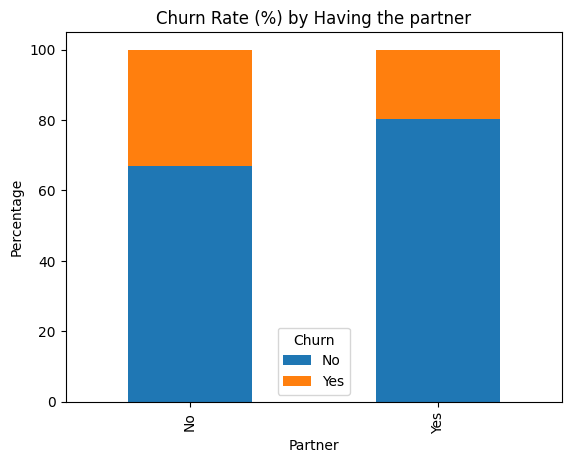

Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


In [89]:
# Calculate churn rate by Partner
Partner_churn_rate = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack() * 100
Partner_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by Having the partner")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(Partner_churn_rate)

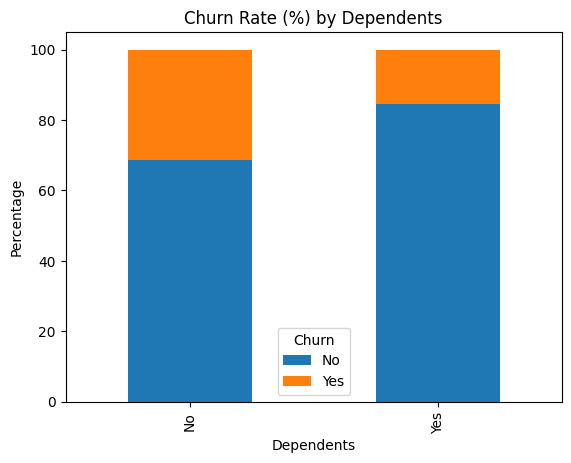

Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


In [90]:
# Calculate churn rate by Dependents
Dependents_churn_rate = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack() * 100
Dependents_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by Dependents")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(Dependents_churn_rate)

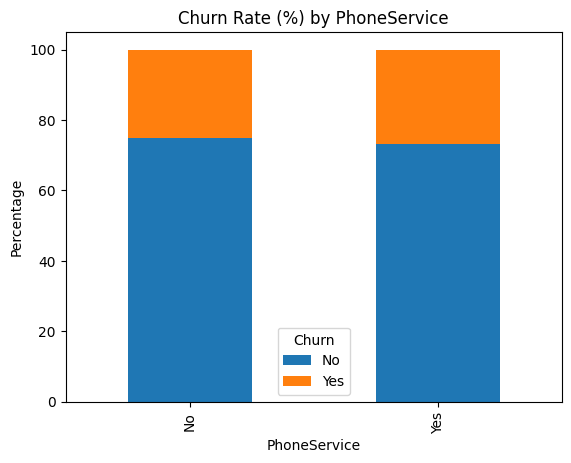

Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


In [91]:
# Calculate churn rate by PhoneService
PhoneService_churn_rate = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack() * 100
PhoneService_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by PhoneService")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(PhoneService_churn_rate)

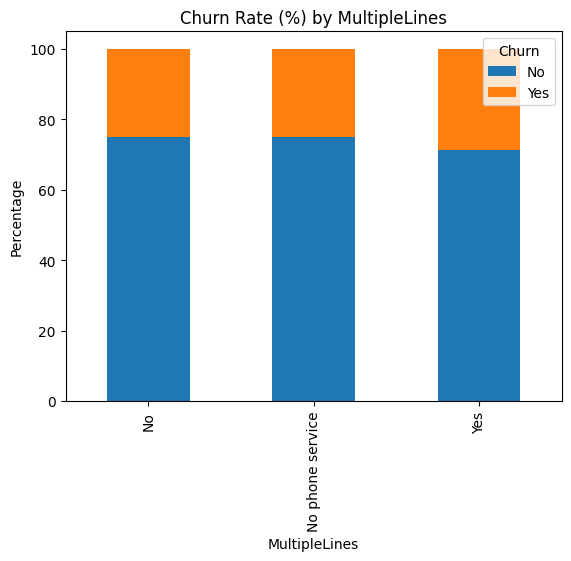

Churn                    No        Yes
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


In [92]:
# Calculate churn rate by MultipleLines
MultipleLines_churn_rate = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack() * 100
MultipleLines_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by MultipleLines")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(MultipleLines_churn_rate)

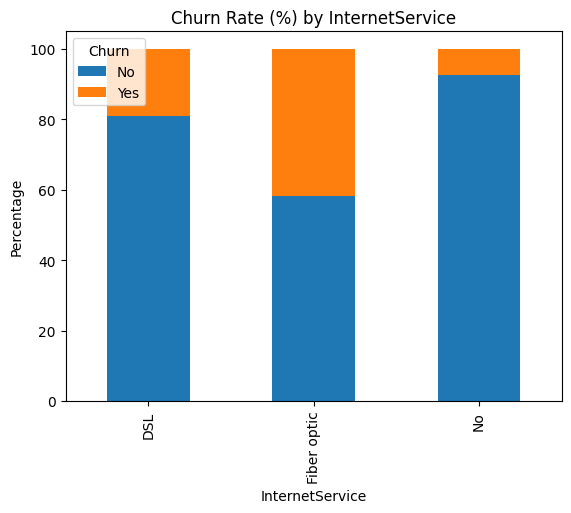

Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


In [93]:
# Calculate churn rate by InternetServices
InternetService_churn_rate = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
InternetService_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by InternetService")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(InternetService_churn_rate)

In [94]:
# Copy to avoid changing original
df_encoded = df.copy()

# Convert Yes = 1, No/No internet service = 0, Churn: Yes=1, No=0
replace_map = {'Yes': 1, 'No': 0, 'No internet service': 0}
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})
df_encoded['OnlineSecurity'] = df_encoded['OnlineSecurity'].map(replace_map)
df_encoded['OnlineBackup'] = df_encoded['OnlineBackup'].map(replace_map)
df_encoded['DeviceProtection'] = df_encoded['DeviceProtection'].map(replace_map)

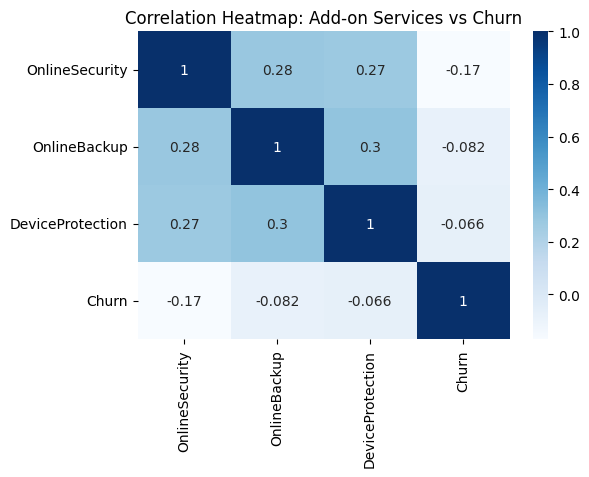

In [95]:
# Select relevant columns
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Churn']

# Create correlation matrix
corr_matrix = df_encoded[cols].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap: Add-on Services vs Churn')
plt.show()

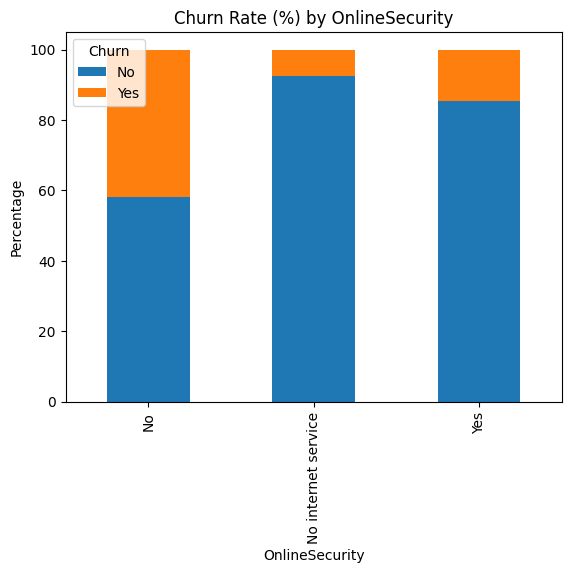

Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


In [96]:
# Calculate churn rate by OnlineSecurity
OnlineSecurity_churn_rate = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack() * 100
OnlineSecurity_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by OnlineSecurity")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(OnlineSecurity_churn_rate)

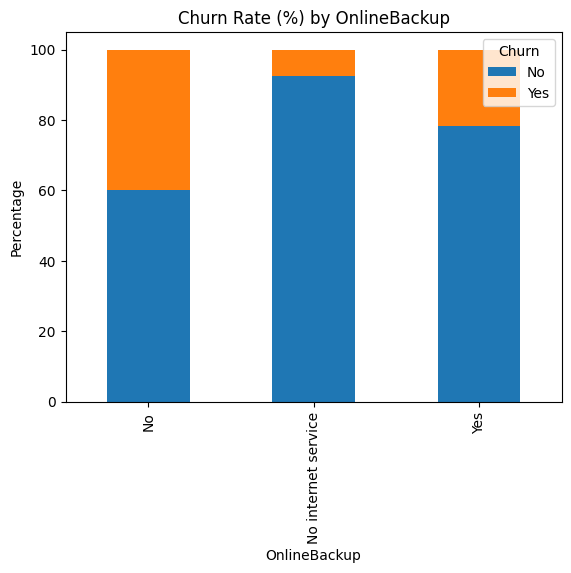

Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


In [97]:
# Calculate churn rate by OnlineBackup
OnlineBackup_churn_rate = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack() * 100
OnlineBackup_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by OnlineBackup")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(OnlineBackup_churn_rate)

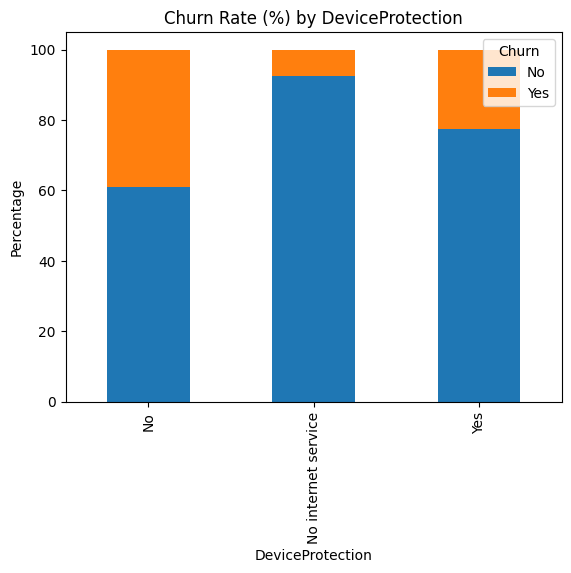

Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


In [98]:
# Calculate churn rate by DeviceProtection
DeviceProtection_churn_rate = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack() * 100
DeviceProtection_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by DeviceProtection")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(DeviceProtection_churn_rate)

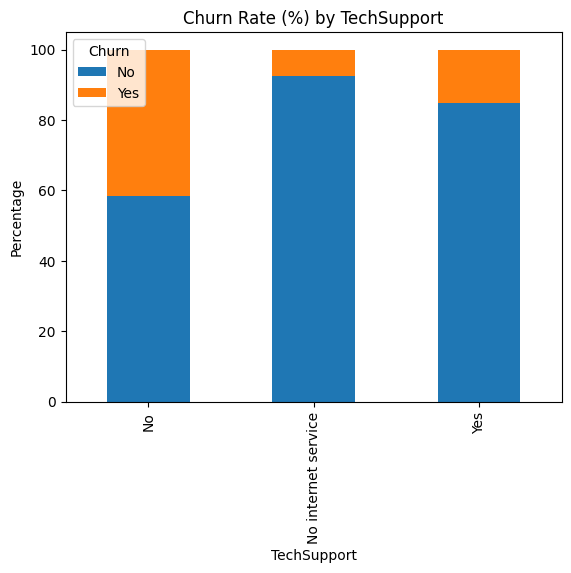

Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


In [99]:
# Calculate churn rate by TechSupport
TechSupport_churn_rate = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack() * 100
TechSupport_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by TechSupport")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(TechSupport_churn_rate)

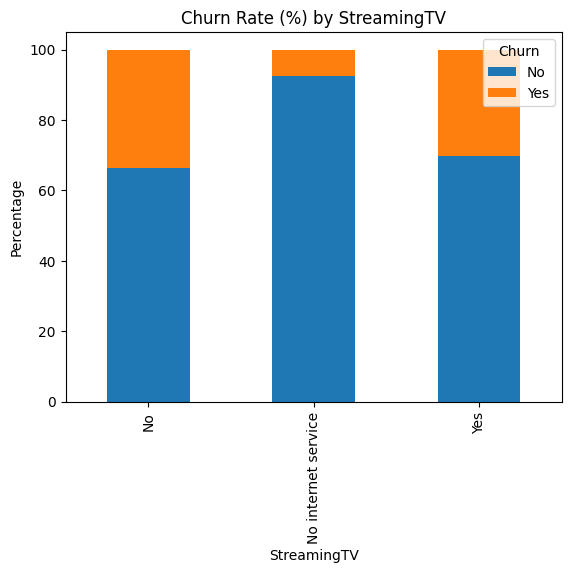

Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


In [100]:
# Calculate churn rate by StreamingTV
StreamingTV_churn_rate = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack() * 100
StreamingTV_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by StreamingTV")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(StreamingTV_churn_rate)

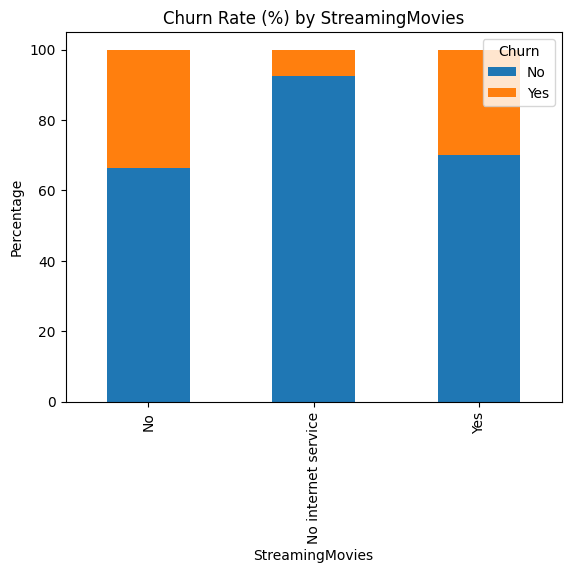

Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


In [101]:
# Calculate churn rate by StreamingMovies
StreamingMovies_churn_rate = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack() * 100
StreamingMovies_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by StreamingMovies")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(StreamingMovies_churn_rate)

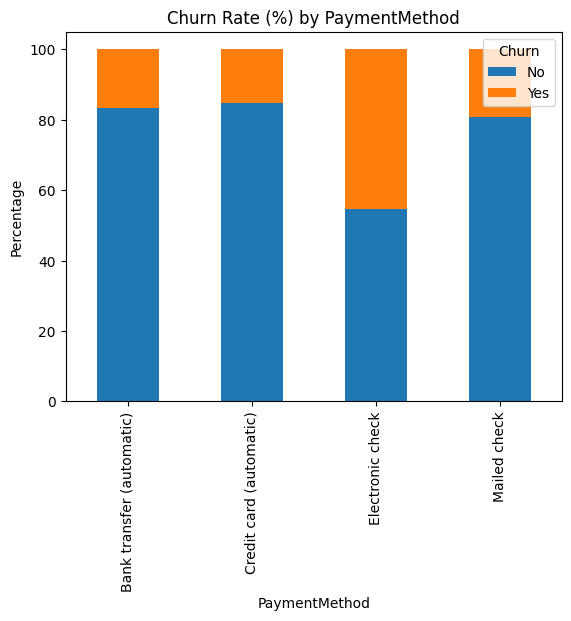

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


In [102]:
# Calculate churn rate by PaymentMethod
PaymentMethod_churn_rate = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
PaymentMethod_churn_rate.plot(kind='bar', stacked=True)
plt.title("Churn Rate (%) by PaymentMethod")
plt.ylabel("Percentage")
plt.show()

# Print exact numbers
print(PaymentMethod_churn_rate)

* Full data processing 

In [103]:
import pandas as pd

df = pd.read_csv("churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [105]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check again for nulls
df.isnull().sum()

# Fill or drop nulls
df = df.dropna()

In [106]:
df.drop("customerID", axis=1, inplace=True)

In [107]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [108]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [159]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [158]:
!which python  # use !where python if you're on Windows

'which' is not recognized as an internal or external command,
operable program or batch file.


In [160]:
%pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse 

In [112]:
import sys
!{sys.executable} -m pip install scikit-learn

In [113]:
from sklearn.preprocessing import StandardScaler


In [114]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Model building

In [115]:
# Just copy your current final dataframe to df_model
df_model = df.copy()  # assuming 'df' is your processed dataframe

# Set up features and target
X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]

In [116]:
y = y.map({'No': 0, 'Yes': 1})


In [117]:
print(y.isna().sum())


7032


In [118]:
print(y.unique())


[nan]


In [119]:
y = y.map({'No': 0, 'Yes': 1})

In [120]:
print(y.isna().sum())  # Should be 0

7032


In [121]:
df_model["Churn"] = df_model["Churn"].astype(str).str.strip().str.lower()
y = df_model["Churn"].map({'no': 0, 'yes': 1})

In [122]:
print(y.isna().sum())   # Should be 0
print(y.unique())       # Should be [0, 1]

7032
[nan]


In [123]:
print(df_model["Churn"].unique())

['0' '1']


In [124]:
print(df_model.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [125]:
print(df_model["Churn"].head(10))

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: object


In [126]:
y = df_model["Churn"].astype(str).astype(int)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [128]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\medha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8017057569296375
Confusion Matrix:
 [[916 117]
 [162 212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



Feature Importance & Model Comparision

In [130]:
#RANDOM FORST MODEL AND FEATURE IMPORTANCE

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.7896233120113717
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



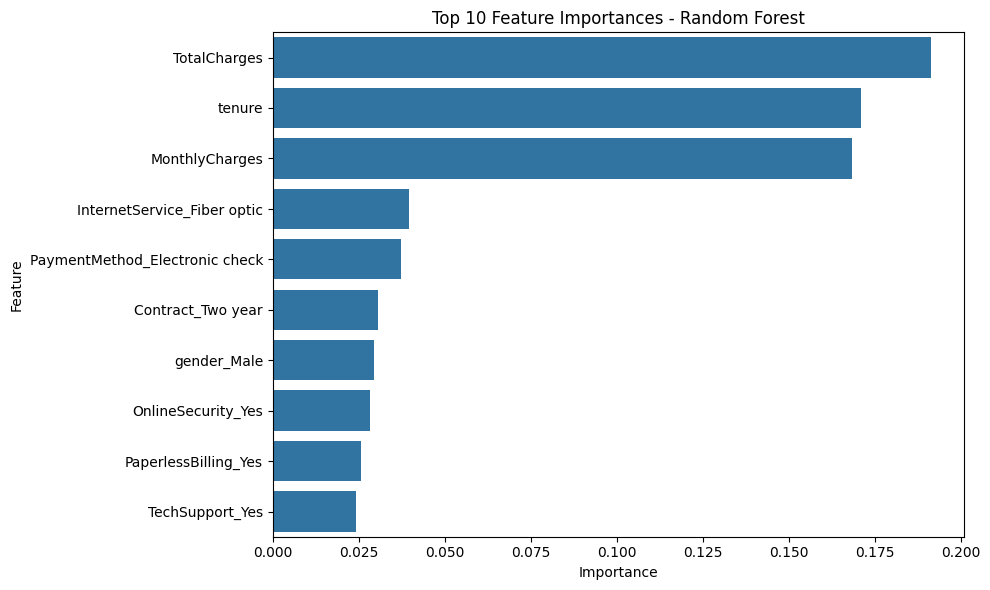

In [131]:
#FEATURE IMPORTANCE PLOT (RANDOM FOREST MODEL)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame of features and importances
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [132]:
!pip install xgboost

In [133]:
!pip install --user xgboost

In [134]:
import sys
print(sys.executable)

c:\Users\medha\AppData\Local\Programs\Python\Python39\python.exe


In [135]:
!pip install xgboost

In [136]:
from xgboost import XGBClassifier

In [137]:
#XGBoost model + comparison 
from xgboost import XGBClassifier

# Initialize and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))


c:\Users\medha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7668798862828714
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



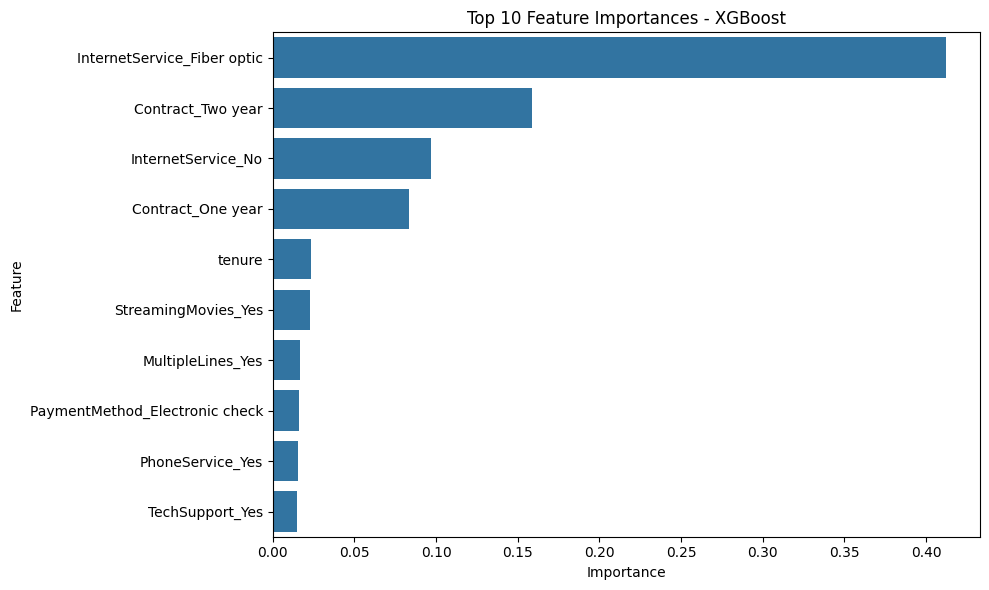

In [138]:
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances.head(10))
plt.title('Top 10 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()


Compare Model Performance

In [139]:
results = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, xgb_preds)
    ]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)

           Model  Accuracy
0  Random Forest  0.789623
1        XGBoost  0.766880


In [140]:
df.to_csv("churn_final.csv", index=False)

In [144]:
import joblib

# Save your best model (say XGBoost)
joblib.dump(rf_model, "churn_model.pkl")

['churn_model.pkl']

In [145]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [147]:
print(X_train.shape)

(5625, 30)


In [149]:
print(X_train.columns.tolist())

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [150]:
df.shape

(7032, 31)